In [ ]:
import numpy as np
import os
import glob
import pandas as pd
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [ ]:
images_dir = "/content/drive/MyDrive/Colab_Notebooks/crop_images"

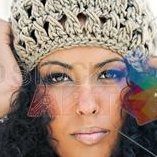

In [ ]:
images = list(glob.glob(os.path.join(images_dir,'*.jpg')))
PIL.Image.open(str(images[200]))

In [ ]:
print(len(images))

20464


In [ ]:
labels_files = "/content/drive/MyDrive/Colab_Notebooks/data/label/label.lst"
df = pd.read_csv(labels_files,header=None,delimiter=" ", names=['image_name', 'face_id_in_image', 'face_box_top', 'face_box_left', 'face_box_right', 'face_box_bottom', 'face_box_cofidence', 'expression_label'])

In [ ]:
df.head()

,image_name,face_id_in_image,face_box_top,face_box_left,face_box_right,face_box_bottom,face_box_cofidence,expression_label
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0


In [ ]:
labels = ["angry","disgust","fear","happy","sad","surprise","neutral"]

In [ ]:
test_dir="/content/drive/MyDrive/Colab_Notebooks/images_train_valid/val"
train_dir="/content/drive/MyDrive/Colab_Notebooks/images_train_valid/train"
BATCH_SIZE=64

In [ ]:
# check images lenght in train directory
for classes in os.listdir(train_dir):
  class_dir = os.path.join(train_dir,classes)
  length = len(os.listdir(class_dir))
  print(f"{classes}: {length}")

angry: 1006
disgust: 1692
fear: 276
happy: 4324
sad: 418
neutral: 7294
surprise: 1692


In [ ]:
# check images lenght in test directory
for classes in os.listdir(test_dir):
  class_dir = os.path.join(test_dir,classes)
  length = len(os.listdir(class_dir))
  print(f"{classes}: {length}")

angry: 252
disgust: 424
fear: 70
happy: 1081
sad: 105
neutral: 1824
surprise: 424


In [ ]:
# augementation configuration we will use for training

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
# augementation configuration we will use for testing
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set=train_datagen.flow_from_directory(train_dir,
                                               target_size=(128,128),
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical')


Found 16702 images belonging to 7 classes.


In [ ]:
test_set=test_datagen.flow_from_directory(test_dir,
                                               target_size=(128,128),
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical')

Found 4180 images belonging to 7 classes.


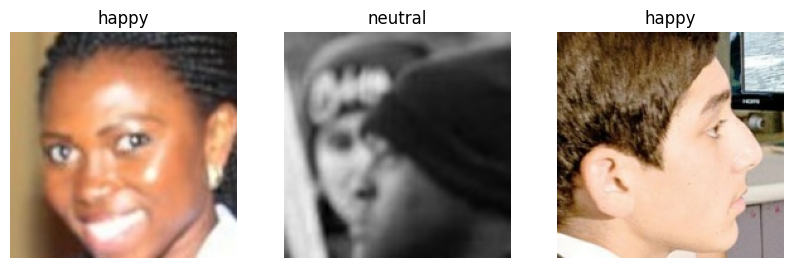

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Model Building

In [ ]:

#Initialising classsifier
model=Sequential()

#Step 1: Convolution
model.add(Conv2D(16,(3,3), input_shape=(128,128,3), activation='relu'))

#step 2: Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#step 3: ADDING A SECOND CONVOLUTIONAL LAYER
model.add(Conv2D(32,(3,3), input_shape=(128,128,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=7,activation='softmax'))




In [ ]:
model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model.fit(
  training_set,
  epochs=20,
  validation_data=test_set,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
261/261 [==============================] - 5854s 22s/step - loss: 1.5129 - accuracy: 0.4332 - val_loss: 1.4353 - val_accuracy: 0.4545
Epoch 2/20
261/261 [==============================] - 365s 1s/step - loss: 1.4234 - accuracy: 0.4548 - val_loss: 1.4199 - val_accuracy: 0.4665
Epoch 3/20
261/261 [==============================] - 347s 1s/step - loss: 1.3843 - accuracy: 0.4745 - val_loss: 1.3915 - val_accuracy: 0.4766
Epoch 4/20
261/261 [==============================] - 364s 1s/step - loss: 1.3555 - accuracy: 0.4774 - val_loss: 1.3670 - val_accuracy: 0.4801
Epoch 5/20
261/261 [==============================] - 351s 1s/step - loss: 1.3320 - accuracy: 0.4923 - val_loss: 1.3893 - val_accuracy: 0.4718
Epoch 6/20
261/261 [==============================] - 355s 1s/step - loss: 1.3119 - accuracy: 0.4991 - val_loss: 1.3485 - val_accuracy: 0.4907
Epoch 7/20
261/261 [==============================] - 360s 1s/step - loss: 1.2865 - accuracy: 0.5060 - val_loss: 1.3660 - val_accuracy: 0.48

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              